**Import Libs**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sklearn
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [0]:
from sklearn import preprocessing

**Read Dataset**

In [16]:
# read xls file with Cleveland heart diseases data
df_full = pd.read_excel('Heart Disease Dataset.xlsx')
df_full.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_rate,temp,spo2,num
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,120,39,94,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,110,37,95,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,85,30,98,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,80,30,97,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,95,38,99,0


In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 17 columns):
age           302 non-null int64
sex           302 non-null int64
cp            302 non-null int64
trestbps      302 non-null int64
chol          302 non-null int64
fbs           302 non-null int64
restecg       302 non-null int64
thalach       302 non-null int64
exang         302 non-null int64
oldpeak       302 non-null float64
slope         302 non-null int64
ca            302 non-null object
thal          302 non-null object
heart_rate    302 non-null int64
temp          302 non-null int64
spo2          302 non-null int64
num           302 non-null int64
dtypes: float64(1), int64(14), object(2)
memory usage: 40.2+ KB


In [18]:
df_full.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,heart_rate,temp,spo2,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,100.109272,36.685430,95.913907,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,33.295984,3.955364,2.595525,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,60.000000,30.000000,90.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,72.000000,34.000000,94.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,90.000000,36.000000,97.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,126.000000,40.000000,98.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,180.000000,46.000000,100.000000,4.000000


In [19]:
df_full['num'].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: num, dtype: int64

**Correlation**

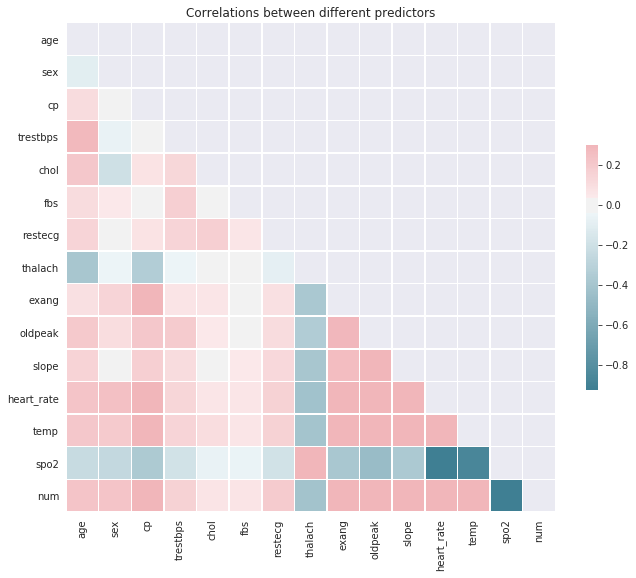

In [20]:
corr_df = df_full.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

**Data Cleaning and transformation**

In [0]:
df_fullna = df_full.replace('?', np.nan)

In [22]:
df_fullna.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
heart_rate    0
temp          0
spo2          0
num           0
dtype: int64

In [0]:
df_fullna['ca'] = df_fullna['ca'].fillna(df_fullna['ca'].median())
df_fullna['thal'] = df_fullna['thal'].fillna(df_fullna['thal'].median())

In [0]:
df = df_fullna

In [26]:
df.isnull().sum() 

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
heart_rate    0
temp          0
spo2          0
num           0
dtype: int64

In [0]:
df2=df

In [0]:
df2.to_csv('cleaned_dataset.csv')

**Train Test Split**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['num'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df2['num'] )

In [29]:
print(X_train.shape)
print(X_test.shape)

(202, 16)
(100, 16)


In [37]:
print(y_train[0:10])

9      0
297    1
69     0
233    0
71     1
137    1
193    0
250    1
259    0
47     0
Name: num, dtype: int64


**Scaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [33]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.583333,1.0,1.000000,0.433962,0.226804,0.0,0.0,0.587786,0.0,0.071429,0.5,0.000000,0.75,0.250000,0.125,0.8
1,0.333333,1.0,0.000000,0.150943,0.474227,0.0,0.0,0.465649,0.0,0.214286,0.5,0.000000,1.00,0.450000,0.500,0.4
2,0.750000,0.0,0.666667,0.575472,0.491409,0.0,0.0,0.587786,0.0,0.142857,0.0,0.000000,0.00,0.016667,0.375,0.8
3,0.520833,0.0,0.666667,0.622642,0.257732,0.0,0.0,0.702290,0.0,0.000000,0.0,0.333333,0.00,0.041667,0.250,0.8
4,0.687500,1.0,1.000000,0.245283,0.484536,0.0,0.0,0.213740,1.0,0.321429,0.5,0.666667,1.00,0.458333,0.375,0.4


# **Model 1: RF**

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_rate,temp,spo2,num
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,120,39,94,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,110,37,95,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,85,30,98,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,80,30,97,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,95,38,99,0


**Grid Search**

In [39]:
# Grid Search CV searches over all the possible combination of hyperparameters and fits the model with the best set of hyperparameters
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf_rf = GridSearchCV(RandomForestClassifier(criterion = 'entropy'), tuned_parameters, cv=10,scoring='accuracy')
clf_rf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf_rf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)


print('Best parameters:')
print(clf_rf.best_params_)
clf_rf_best = clf_rf.best_estimator_

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12
           3       0.92      1.00      0.96        12
           4       1.00      0.75      0.86         4

    accuracy                           0.99       100
   macro avg       0.98      0.95      0.96       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[54  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  1  3]]
Best parameters:
{'class_weight': None, 'max_depth': 5, 'n_estimators': 8, 'random_state': 42}


**Accuracy Score**

In [40]:
acc=sklearn.metrics.accuracy_score(y_test, clf_rf.predict(X_test))
print("RF Accuracy ->"+str(acc*100))

RF Accuracy ->99.0


**Saving the model**

In [0]:
rf_file = open('rf.pckl', 'wb')
pickle.dump(clf_rf, rf_file)
rf_file.close()

**Inference**

In [0]:
test = df2.iloc[0:1]

In [45]:
# Label 2
test 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_rate,temp,spo2,num
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,120,39,94,2


In [56]:
test_x = test.iloc[:,0:16]
test_x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_rate,temp,spo2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,120,39,94


In [57]:
print(test_x.shape)
test_scaled = scaler.transform(test_x)
test_scaled


(1, 16)


array([[0.89189189, 1.        , 1.        , 0.76744186, 0.33012048,
        0.        , 1.        , 0.2       , 1.        , 0.24193548,
        0.5       , 1.        , 0.        , 0.51282051, 0.5625    ,
        0.4       ]])

In [60]:
prediction_test = clf_rf.predict(test_scaled)
print('Prediction is : ' + str(prediction_test))

Prediction is : [2]
